In [1]:
!pip install pandas

# Load Dataset

In [4]:
import pandas as pd

data = "C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/The-Office-Lines-V4.csv"
raw_df = pd.read_csv(data)
display(raw_df)

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN
...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,NaN
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,NaN
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,NaN
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,NaN


In [5]:
lines = raw_df['line']
display(lines)

0        All right Jim. Your quarterlies look very good...
1               Oh, I told you. I couldn't close it. So...
2        So you've come to the master for guidance? Is ...
3               Actually, you called me in here, but yeah.
4          All right. Well, let me show you how it's done.
                               ...                        
54621    It all seems so very arbitrary. I applied for ...
54622    I just feel lucky that I got a chance to share...
54623    I'm happy that this was all filmed so I can re...
54624    I sold paper at this company for 12 years. My ...
54625    I thought it was weird when you picked us to m...
Name: line, Length: 54626, dtype: object

In [6]:
speaker = raw_df['speaker']
print(len(speaker.unique()))
display(speaker.unique())

775


array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Michel', 'Todd Packer',
       'Phyllis', 'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man',
       'Roy', 'Mr. Brown', 'Toby', 'Kelly', 'Meredith', 'Travel Agent',
       'Man on Phone', 'Everybody', 'Lonny', 'Darryl', 'Teammates',
       'Michael and Dwight', 'Warehouse worker', 'Madge', 'Worker',
       'Katy', 'Guy at bar', 'Other Guy at Bar', 'Guy At Bar',
       'Pam and Jim', 'Employee', "Chili's Employee", 'Warehouse Guy',
       'Warehouse guy', 'Man in Video', 'Video', 'Actor',
       'Redheaded Actress', "Mr. O'Malley", 'Albiny', "Pam's Mom",
       'Carol', 'Bill', 'Everyone', 'Crowd', 'song', 'Song',
       'Dwight and Michael', 'Sherri', 'Creed', 'Devon', 'Children',
       'Kid', 'Ira', "Ryan's Voicemail", 'Christian', 'Hostess',
       'Michael and Christian', 'Sadiq (IT guy)', 'Mark',
       'Improv Teacher', 'Mary-Beth', 'Girl acting Pregnant', 'Actress',
       'Michael and Jim', 'Kevin & Oscar', 'All', 'Liquor Sto

# Data Preprocessing

In [7]:
raw_df = raw_df.iloc[:, :-1]
display(raw_df)

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."
...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...


In [8]:
# drop all columns except speaker and line
df = raw_df.iloc[:, 4:]
display(df)

,speaker,line
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."
...,...,...
54621,Creed,It all seems so very arbitrary. I applied for ...
54622,Meredith,I just feel lucky that I got a chance to share...
54623,Phyllis,I'm happy that this was all filmed so I can re...
54624,Jim,I sold paper at this company for 12 years. My ...


### Identify high frequency lines

In [9]:
# Calculate the frequency of each speaker
speaker_counts = df['speaker'].value_counts()

# Filter the DataFrame to keep only rows where the speaker appears at least 100 times
df = df[df['speaker'].isin(speaker_counts[speaker_counts >= 1000].index)].reset_index(drop=True)
display(df)

,speaker,line
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."
...,...,...
40573,Oscar,You're not gay.
40574,Erin,How did you do it? How did you capture what it...
40575,Darryl,"Everyday when I came into work, all I wanted t..."
40576,Jim,I sold paper at this company for 12 years. My ...


In [10]:
speaker = df['speaker']
print(len(speaker.unique()))
display(speaker.unique())

11


array(['Michael', 'Jim', 'Pam', 'Dwight', 'Oscar', 'Angela', 'Kevin',
       'Ryan', 'Darryl', 'Andy', 'Erin'], dtype=object)

### Cut out short lines

In [11]:
# Drop rows with 3 words or less in the 'line' column
df = df[df['line'].apply(lambda x: len(x.split()) > 3)].reset_index(drop=True)
display(df)

,speaker,line
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."
...,...,...
28939,Kevin,"No, but maybe the reason..."
28940,Erin,How did you do it? How did you capture what it...
28941,Darryl,"Everyday when I came into work, all I wanted t..."
28942,Jim,I sold paper at this company for 12 years. My ...


In [12]:
df.to_csv('C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines.csv')

### Tokenization & Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

data = 'C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines.csv'
clean_df = pd.read_csv(data)

# create CV object
CV = CountVectorizer(input='content', stop_words='english')

# create document term matrix
dtm = CV.fit_transform(clean_df['line'])

print(dtm[0])

  (0, 11872)	1
  (0, 7657)	1
  (0, 11204)	1
  (0, 8390)	1
  (0, 6132)	1
  (0, 14336)	1
  (0, 8215)	1


In [14]:
df = pd.DataFrame(dtm.toarray(), columns=CV.get_feature_names_out())

df.insert(0, 'LABEL', clean_df['speaker'])
display(df)

,LABEL,00,000,001,00983,01,03,05,10,100,...,zombie,zombies,zone,zoo,zoom,zoppity,zoran,zuckerberg,zuckerberged,zwarte
0,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28939,Kevin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28940,Erin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28941,Darryl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28942,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split dataset into Training and Testing sets

In [15]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet = train_test_split(df, test_size=0.3)

In [16]:
# split testing labels from testing data
TestLabels = TestSet['LABEL']
TestSet = TestSet.drop(["LABEL"], axis=1)  # remove the entire column

# split training labels from training data
TrainLabels = TrainSet['LABEL']
TrainSet = TrainSet.drop(["LABEL"], axis=1)  # remove the entire column

# Train Model (Naive Bayes)

In [15]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

MyModel = MultinomialNB()

TrainedModel = MyModel.fit(TrainSet, TrainLabels)
Prediction = MyModel.predict(TestSet)
print(Prediction)
print(np.round(MyModel.predict_proba(TestSet),2))

['Michael' 'Michael' 'Michael' ... 'Michael' 'Michael' 'Michael']
[[0.01 0.   0.   ... 0.   0.   0.  ]
 [0.06 0.01 0.   ... 0.   0.06 0.  ]
 [0.04 0.01 0.01 ... 0.   0.05 0.01]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.1  0.03 0.03 ... 0.03 0.11 0.03]
 [0.   0.   0.   ... 0.   0.   0.  ]]


# Test Model (Naive Bayes)


The Model (Multinomial Naive Bayes) confusion matrix is:


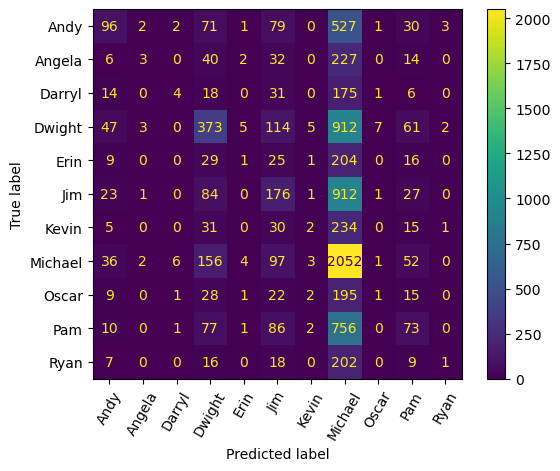


Accuracy:


0.3203592814371258

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(TestLabels, Prediction, labels=TrainedModel.classes_)
print("\nThe Model (Multinomial Naive Bayes) confusion matrix is:")
# print(cnf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=TrainedModel.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, Prediction)

In [28]:
from sklearn import metrics

# Print a classification report
print(metrics.classification_report(TestLabels, Prediction))

              precision    recall  f1-score   support

        Andy       0.37      0.12      0.18       812
      Angela       0.27      0.01      0.02       324
      Darryl       0.29      0.02      0.03       249
      Dwight       0.40      0.24      0.30      1529
        Erin       0.07      0.00      0.01       285
         Jim       0.25      0.14      0.18      1225
       Kevin       0.12      0.01      0.01       318
     Michael       0.32      0.85      0.47      2409
       Oscar       0.08      0.00      0.01       274
         Pam       0.23      0.07      0.11      1006
        Ryan       0.14      0.00      0.01       253

    accuracy                           0.32      8684
   macro avg       0.23      0.13      0.12      8684
weighted avg       0.29      0.32      0.24      8684



# Train Model (SVM)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# scale training and testing sets for use by SVMs
scaling = MinMaxScaler(feature_range=(-1,1)).fit(TrainSet)
TrainSetScaled = scaling.transform(TrainSet)
TestSetScaled = scaling.transform(TestSet)

In [20]:
from sklearn.svm import LinearSVC
import time
from tqdm import tqdm


# Initialize LinearSVC model
SVM_Model = LinearSVC(C=10, 
                       max_iter=10000,
                       dual=True,
                       verbose=True)

# Start the timer
start_time = time.time()

# Fit the model with progress bar
with tqdm(total=len(TrainSetScaled)) as pbar:
    trainedSVM1 = SVM_Model.fit(TrainSetScaled, TrainLabels)
    pbar.update(len(TrainSetScaled))

# Predict with the trained model
with tqdm(total=len(TestSetScaled)) as pbar:
    predSVM = SVM_Model.predict(TestSetScaled)
    pbar.update(len(TestSetScaled))

# Print the predictions
print(predSVM)

# Calculate the time taken
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to minutes and seconds
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Print the time taken
print(f"Time taken: {minutes} minutes and {seconds} seconds")

  0%|                                                                                        | 0/20260 [00:00<?, ?it/s]

[LibLinear]

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████| 8684/8684 [00:00<00:00, 14097.42it/s]

['Jim' 'Jim' 'Jim' ... 'Jim' 'Jim' 'Michael']
Time taken: 659 minutes and 11 seconds


# Test Model (SVM)


The Model 2 (SVM with Linear SVC) confusion matrix is:


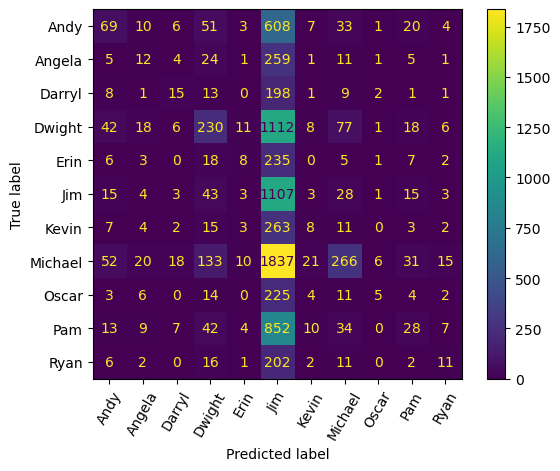


Accuracy:


0.20255642561031784

In [21]:
cnf_matrix2 = confusion_matrix(TestLabels, predSVM, labels=trainedSVM1.classes_)
print("\nThe Model (SVM with Linear SVC) confusion matrix is:")
# print(cnf_matrix2)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2,
                              display_labels=trainedSVM1.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, predSVM)

In [22]:
# Print a classification report
print(metrics.classification_report(TestLabels, predSVM))

              precision    recall  f1-score   support

        Andy       0.31      0.08      0.13       812
      Angela       0.13      0.04      0.06       324
      Darryl       0.25      0.06      0.10       249
      Dwight       0.38      0.15      0.22      1529
        Erin       0.18      0.03      0.05       285
         Jim       0.16      0.90      0.27      1225
       Kevin       0.12      0.03      0.04       318
     Michael       0.54      0.11      0.18      2409
       Oscar       0.28      0.02      0.03       274
         Pam       0.21      0.03      0.05      1006
        Ryan       0.20      0.04      0.07       253

    accuracy                           0.20      8684
   macro avg       0.25      0.14      0.11      8684
weighted avg       0.33      0.20      0.16      8684



# Train Model (Random Forest)

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
trainedRF = RF.fit(TrainSet, TrainLabels)
RF_pred = RF.predict(TestSet)


The confusion matrix (Random Forest) is:


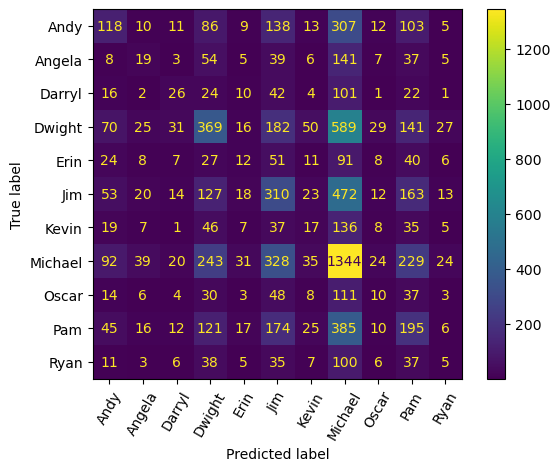


Accuracy:


0.2792491939198526

In [32]:
bn_matrix_RF_text = confusion_matrix(TestLabels, RF_pred)
print("\nThe confusion matrix (Random Forest) is:")
# print(bn_matrix_RF_text)
disp = ConfusionMatrixDisplay(confusion_matrix=bn_matrix_RF_text,
                              display_labels=trainedRF.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, RF_pred)

In [33]:
# Print a classification report
print(metrics.classification_report(TestLabels, RF_pred))

              precision    recall  f1-score   support

        Andy       0.25      0.15      0.18       812
      Angela       0.12      0.06      0.08       324
      Darryl       0.19      0.10      0.14       249
      Dwight       0.32      0.24      0.27      1529
        Erin       0.09      0.04      0.06       285
         Jim       0.22      0.25      0.24      1225
       Kevin       0.09      0.05      0.07       318
     Michael       0.36      0.56      0.43      2409
       Oscar       0.08      0.04      0.05       274
         Pam       0.19      0.19      0.19      1006
        Ryan       0.05      0.02      0.03       253

    accuracy                           0.28      8684
   macro avg       0.18      0.16      0.16      8684
weighted avg       0.25      0.28      0.26      8684



# Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier

MyNN = MLPClassifier(solver='lbfgs',
                    #solver='adam',
                    #solver='sgd',
                     alpha=1,
                     activation='relu',
                     hidden_layer_sizes=(100, 2),
                     batch_size='auto',
                     learning_rate_init=0.001,
                     max_iter=500,
                     random_state=1)

trainedNN = MyNN.fit(TrainSet, TrainLabels)
NNPrediction = MyNN.predict(TestSet)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


confusion matrix for NN



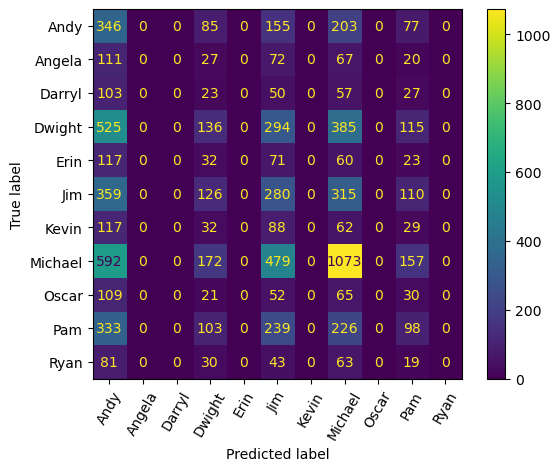


Accuracy:


0.22259327498848458

In [24]:
print("confusion matrix for NN\n")
NN_matrix = confusion_matrix(TestLabels, NNPrediction)
# print(NN_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=NN_matrix,
                              display_labels=trainedNN.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, NNPrediction)

In [27]:
# Print a classification report
print(metrics.classification_report(TestLabels, NNPrediction))

              precision    recall  f1-score   support

        Andy       0.12      0.40      0.19       866
      Angela       0.00      0.00      0.00       297
      Darryl       0.00      0.00      0.00       260
      Dwight       0.17      0.09      0.12      1455
        Erin       0.00      0.00      0.00       303
         Jim       0.15      0.24      0.19      1190
       Kevin       0.00      0.00      0.00       328
     Michael       0.42      0.43      0.43      2473
       Oscar       0.00      0.00      0.00       277
         Pam       0.14      0.10      0.12       999
        Ryan       0.00      0.00      0.00       236

    accuracy                           0.22      8684
   macro avg       0.09      0.11      0.09      8684
weighted avg       0.20      0.22      0.20      8684



C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# LSTM using Word2Vec

In [35]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install gensim
!pip install tensorflow

     ---------------------------------------- 1.1/1.1 MB 16.9 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ------------------------------------- 220.7/220.7 kB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 127.8/127.8 kB ? eta 0:00:00
     ------------------------------------- 376.9/376.9 MB 15.6 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 3.8/3.8 MB 60.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 2.7/2.7 MB 57.1 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 59.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 70.3 MB/s eta 0:00:00
     ---------------------

In [68]:
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines.csv')
df = df.iloc[:, 1:]

# Tokenize text and train Word2Vec model
sentences = [str(line).split() for line in df['line']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

display(df)

,speaker,line
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."
...,...,...
28939,Kevin,"No, but maybe the reason..."
28940,Erin,How did you do it? How did you capture what it...
28941,Darryl,"Everyday when I came into work, all I wanted t..."
28942,Jim,I sold paper at this company for 12 years. My ...


In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

# Prepare data for LSTM model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['line'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['line'])

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Initialize LabelEncoder and encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['speaker'])

# Example: Print the first padded sequence
print("Padded Sequence:")
print(padded_sequences[0])

Padded Sequence:
[  35   41   89   33 9078   99  103   57   59   28  178   52    3 9079
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0

In [70]:
# Create word embeddings matrix
embedding_matrix = np.zeros((len(word_index) + 1, 100))  # Assuming word vectors are of size 100
for word, i in word_index.items():
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

In [73]:
# Build LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 
                    100,
                    trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [74]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
trainedLSTM = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.0364 - loss: -143.6185 - val_accuracy: 0.0345 - val_loss: -434.4125
Epoch 2/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.0362 - loss: -537.1876 - val_accuracy: 0.0345 - val_loss: -809.9811
Epoch 3/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.0377 - loss: -918.4628 - val_accuracy: 0.0345 - val_loss: -1184.1460
Epoch 4/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.0365 - loss: -1283.8552 - val_accuracy: 0.0345 - val_loss: -1558.6738
Epoch 5/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.0343 - loss: -1658.9115 - val_accuracy: 0.0345 - val_loss: -1932.5081
Epoch 6/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0377 - loss: -2046.0502 - val_accuracy: 0.0345 - val_loss: -2306.1960
Epoch 7/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.0361 - loss: -2424.7954 - val_accuracy: 0.0345 - val_loss: -2679.5393
Epoch 8/100
724/724 ━━━━━━━━━━━━

Epoch 48/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.0375 - loss: -18228.2637 - val_accuracy: 0.0345 - val_loss: -18308.6445
Epoch 49/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0352 - loss: -18536.6660 - val_accuracy: 0.0345 - val_loss: -18697.6953
Epoch 50/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0370 - loss: -18945.8867 - val_accuracy: 0.0345 - val_loss: -19085.8574
Epoch 51/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0343 - loss: -19400.2598 - val_accuracy: 0.0345 - val_loss: -19474.5098
Epoch 52/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.0357 - loss: -19885.3750 - val_accuracy: 0.0345 - val_loss: -19862.4902
Epoch 53/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0360 - loss: -19969.6641 - val_accuracy: 0.0345 - val_loss: -20251.3203
Epoch 54/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0369 - loss: -20490.4434 - val_accuracy: 0.0345 - val_loss: -20639.8730
Epoch 

724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0364 - loss: -36036.7031 - val_accuracy: 0.0345 - val_loss: -36182.4531
Epoch 95/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.0369 - loss: -36578.3359 - val_accuracy: 0.0345 - val_loss: -36571.0664
Epoch 96/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.0339 - loss: -36901.5898 - val_accuracy: 0.0345 - val_loss: -36959.9414
Epoch 97/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.0346 - loss: -37423.7656 - val_accuracy: 0.0345 - val_loss: -37348.0430
Epoch 98/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.0362 - loss: -37756.5625 - val_accuracy: 0.0345 - val_loss: -37736.7109
Epoch 99/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.0352 - loss: -38109.0156 - val_accuracy: 0.0345 - val_loss: -38125.2578
Epoch 100/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.0356 - loss: -38631.8672 - val_accuracy: 0.0345 - val_loss: -38513.7227


In [75]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.0358 - loss: -38890.9570
Test Accuracy: 0.034548282623291016


# Naive Bayes with fewer classes

In [128]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv('C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines.csv')

# Calculate the frequency of each speaker
speaker_counts = df['speaker'].value_counts()

# Filter the DataFrame to keep only rows where the speaker appears at least 100 times
df = df[df['speaker'].isin(speaker_counts[speaker_counts >= 2000].index)].reset_index(drop=True)

df = df.iloc[:,1:]
display(df)

,speaker,line
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."
...,...,...
23317,Andy,You might feel sorry for me but I actually fe...
23318,Andy,I spent so much of my time here at Dunder Miff...
23319,Jim,Imagine going back and watching a tape of your...
23320,Jim,I sold paper at this company for 12 years. My ...


In [129]:
speaker = df['speaker']
print(len(speaker.unique()))
display(speaker.unique())

5


array(['Michael', 'Jim', 'Pam', 'Dwight', 'Andy'], dtype=object)

In [130]:
df.to_csv('C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines_5_speakers.csv')

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

data = 'C:/Users/Patrick/Syracuse_courses/IST_736/Final_Project/cleaned_lines_5_speakers.csv'
clean_df = pd.read_csv(data)

# create CV object
CV = CountVectorizer(input='content', stop_words='english')

# create document term matrix
dtm = CV.fit_transform(clean_df['line'])

print(dtm[0])

  (0, 10876)	1
  (0, 7019)	1
  (0, 10259)	1
  (0, 7683)	1
  (0, 5616)	1
  (0, 13137)	1
  (0, 7517)	1


In [132]:
df = pd.DataFrame(dtm.toarray(), columns=CV.get_feature_names_out())

df.insert(0, 'LABEL', clean_df['speaker'])
display(df)

,LABEL,00,000,01,03,05,10,100,1000,100k,...,zit,zits,zombie,zombies,zone,zoo,zoom,zoppity,zoran,zuckerberg
0,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Michael,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23317,Andy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23318,Andy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23319,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23320,Jim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet = train_test_split(df, test_size=0.3)

In [134]:
# split testing labels from testing data
TestLabels = TestSet['LABEL']
TestSet = TestSet.drop(["LABEL"], axis=1)  # remove the entire column

# split training labels from training data
TrainLabels = TrainSet['LABEL']
TrainSet = TrainSet.drop(["LABEL"], axis=1)  # remove the entire column

In [135]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

MyModel2 = MultinomialNB()

TrainedModel2 = MyModel2.fit(TrainSet, TrainLabels)
Prediction2 = MyModel2.predict(TestSet)
print(Prediction2)
print(np.round(MyModel2.predict_proba(TestSet),2))

['Michael' 'Michael' 'Jim' ... 'Michael' 'Michael' 'Jim']
[[0.03 0.08 0.04 0.65 0.2 ]
 [0.05 0.15 0.03 0.75 0.02]
 [0.03 0.02 0.36 0.33 0.26]
 ...
 [0.12 0.21 0.18 0.35 0.14]
 [0.01 0.04 0.12 0.78 0.05]
 [0.15 0.1  0.36 0.33 0.07]]



The Model (Multinomial Naive Bayes) confusion matrix is:


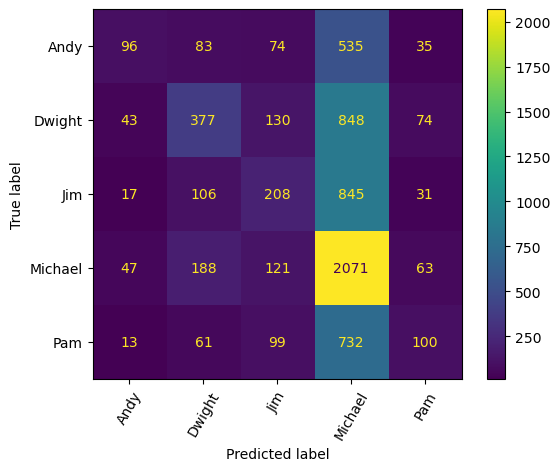


Accuracy:


0.407603258539374

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cnf_matrix_2 = confusion_matrix(TestLabels, Prediction2, labels=TrainedModel2.classes_)
print("\nThe Model (Multinomial Naive Bayes) confusion matrix is:")
# print(cnf_matrix_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_2,
                              display_labels=TrainedModel2.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, Prediction2)

In [137]:
# Print a classification report
print(metrics.classification_report(TestLabels, Prediction2))

              precision    recall  f1-score   support

        Andy       0.44      0.12      0.18       823
      Dwight       0.46      0.26      0.33      1472
         Jim       0.33      0.17      0.23      1207
     Michael       0.41      0.83      0.55      2490
         Pam       0.33      0.10      0.15      1005

    accuracy                           0.41      6997
   macro avg       0.40      0.30      0.29      6997
weighted avg       0.40      0.41      0.35      6997



### Class weighting to account for inbalanced dataset

In [150]:
from sklearn.utils import class_weight
from sklearn.svm import SVC

# Calculate class weights
classes = np.unique(TrainLabels)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=TrainLabels)

# Print the computed class weights
print("Class Weights:", class_weights)

# Create a dictionary mapping class labels to their weights
class_weights_dict = dict(zip(classes, class_weights))

# Map class labels to their corresponding weights using NumPy indexing
sample_weights = np.array([class_weights_dict[label] for label in TrainLabels])

# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Fit the SVM model with sample weights
svm_trained = svm_model.fit(TrainSet, TrainLabels, sample_weight=sample_weights)

Class Weights: [1.69786791 0.93821839 1.12160769 0.57391457 1.40611542]


In [151]:
# Make predictions on the test set
predictions = svm_model.predict(TestSet)


The Model (Linear SVC) confusion matrix is:


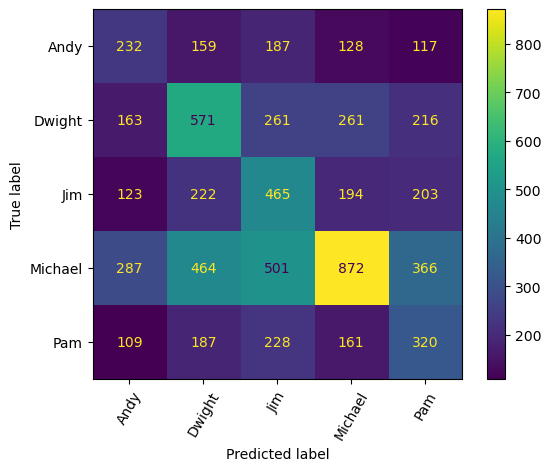


Accuracy:


0.3515792482492497

In [152]:
cnf_matrix_3 = confusion_matrix(TestLabels, predictions, labels=svm_trained.classes_)
print("\nThe Model (Linear SVC) confusion matrix is:")
# print(cnf_matrix_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_3,
                              display_labels=svm_trained.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Rotate the x-axis tick labels
plt.xticks(rotation=60)

plt.show()

print('\nAccuracy:')
accuracy_score(TestLabels, predictions)

In [153]:
from sklearn.metrics import classification_report

# Evaluate the model using classification metrics
report = classification_report(TestLabels, predictions, target_names=classes)
print(report)

              precision    recall  f1-score   support

        Andy       0.25      0.28      0.27       823
      Dwight       0.36      0.39      0.37      1472
         Jim       0.28      0.39      0.33      1207
     Michael       0.54      0.35      0.42      2490
         Pam       0.26      0.32      0.29      1005

    accuracy                           0.35      6997
   macro avg       0.34      0.34      0.34      6997
weighted avg       0.38      0.35      0.36      6997

